In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import timeit
from sklearn.model_selection import cross_val_score
#from xgboost import XGBClassifier
import xgboost as xgb
from statistics import mean
import operator

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [4]:
train.columns

Index(['id', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6',
       'feat_7', 'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12',
       'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18',
       'feat_19', 'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24',
       'feat_25', 'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30',
       'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36',
       'feat_37', 'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42',
       'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48',
       'feat_49', 'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54',
       'feat_55', 'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60',
       'feat_61', 'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66',
       'feat_67', 'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72',
       'feat_73', 'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78',
       'feat_79', 'feat_80', 'feat_81', 'feat_82', 'fe

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 95 columns):
id         61878 non-null int64
feat_1     61878 non-null int64
feat_2     61878 non-null int64
feat_3     61878 non-null int64
feat_4     61878 non-null int64
feat_5     61878 non-null int64
feat_6     61878 non-null int64
feat_7     61878 non-null int64
feat_8     61878 non-null int64
feat_9     61878 non-null int64
feat_10    61878 non-null int64
feat_11    61878 non-null int64
feat_12    61878 non-null int64
feat_13    61878 non-null int64
feat_14    61878 non-null int64
feat_15    61878 non-null int64
feat_16    61878 non-null int64
feat_17    61878 non-null int64
feat_18    61878 non-null int64
feat_19    61878 non-null int64
feat_20    61878 non-null int64
feat_21    61878 non-null int64
feat_22    61878 non-null int64
feat_23    61878 non-null int64
feat_24    61878 non-null int64
feat_25    61878 non-null int64
feat_26    61878 non-null int64
feat_27    61878 non-null i

In [6]:
train.isnull().sum()

id         0
feat_1     0
feat_2     0
feat_3     0
feat_4     0
feat_5     0
feat_6     0
feat_7     0
feat_8     0
feat_9     0
feat_10    0
feat_11    0
feat_12    0
feat_13    0
feat_14    0
feat_15    0
feat_16    0
feat_17    0
feat_18    0
feat_19    0
feat_20    0
feat_21    0
feat_22    0
feat_23    0
feat_24    0
feat_25    0
feat_26    0
feat_27    0
feat_28    0
feat_29    0
          ..
feat_65    0
feat_66    0
feat_67    0
feat_68    0
feat_69    0
feat_70    0
feat_71    0
feat_72    0
feat_73    0
feat_74    0
feat_75    0
feat_76    0
feat_77    0
feat_78    0
feat_79    0
feat_80    0
feat_81    0
feat_82    0
feat_83    0
feat_84    0
feat_85    0
feat_86    0
feat_87    0
feat_88    0
feat_89    0
feat_90    0
feat_91    0
feat_92    0
feat_93    0
target     0
Length: 95, dtype: int64

<Figure size 1440x2160 with 0 Axes>

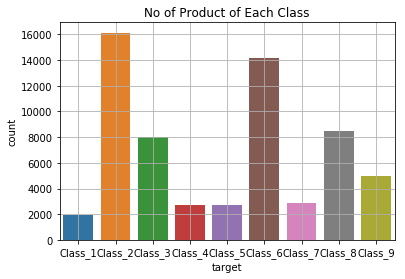

<Figure size 1440x2160 with 0 Axes>

In [7]:
# plot number of product of each class

# sort by order
order = sorted(set(train['target']))
sns.countplot(x='target', data=train,order=order)
plt.grid()
plt.title("No of Product of Each Class")
plt.figure(num=None, figsize=(20, 30))

In [10]:
def bar_plot(col, data, hue=None):
    f, ax = plt.subplots(figsize=(10,5))
    sns.countplot(x=col, hue=hue, data=data, alpha=0.5)
    plt.show()
    
def dist_plot(col,data):
    f, ax = plt.subplots(figsize=(10,5))
    sns.distplot(data[col].dropna(), kde=False, bins=10)
    plt.show()

In [16]:
def bar_plot_comp(col, data):
    f, ax = plt.subplots(figsize=(10,5))
    sns.barplot(x=col, y='target', data=data, alpha=0.5)
    plt.show()

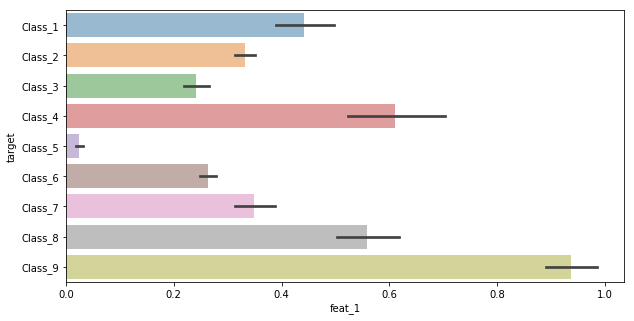

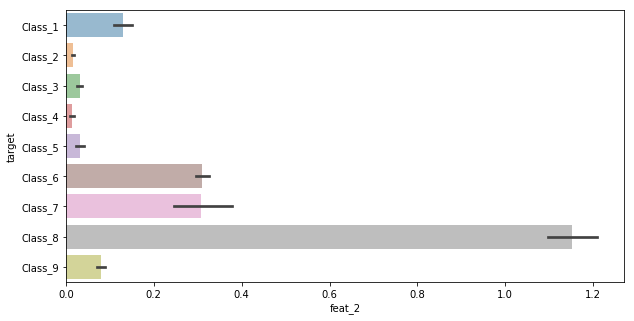

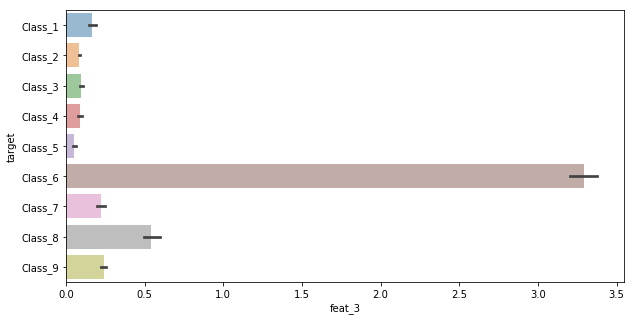

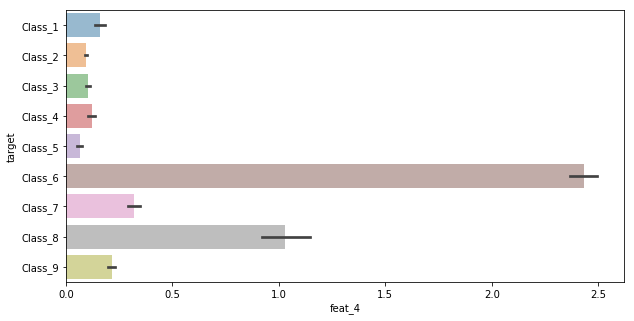

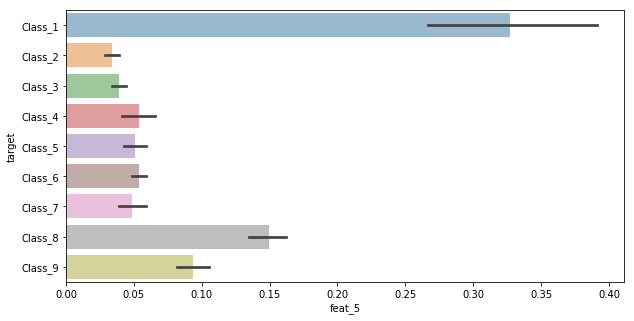

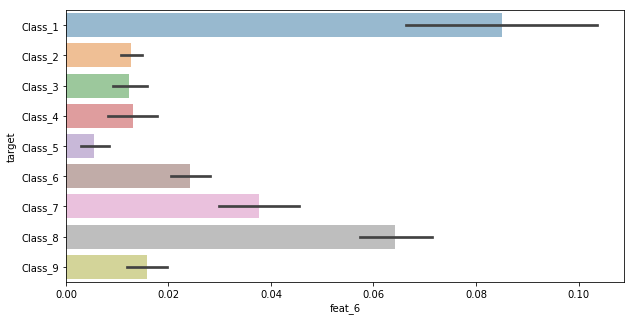

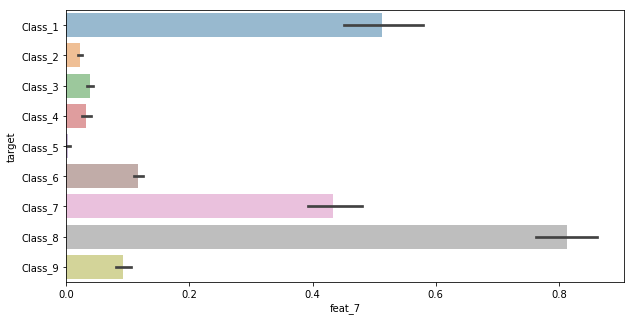

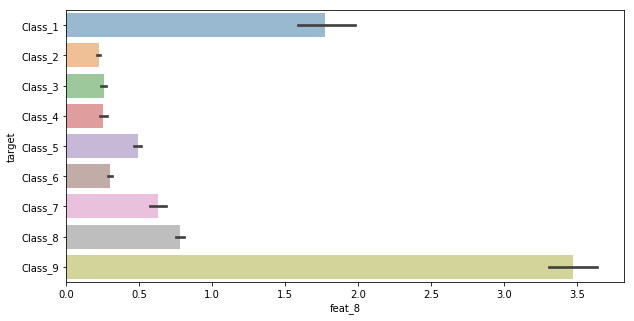

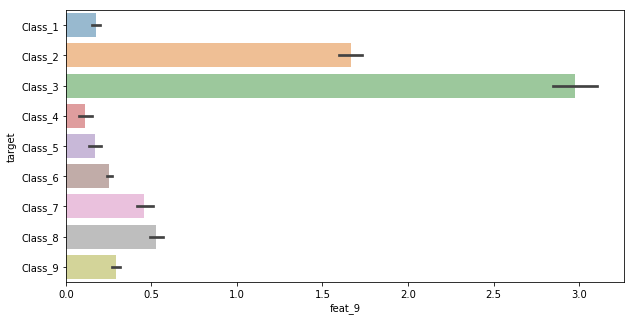

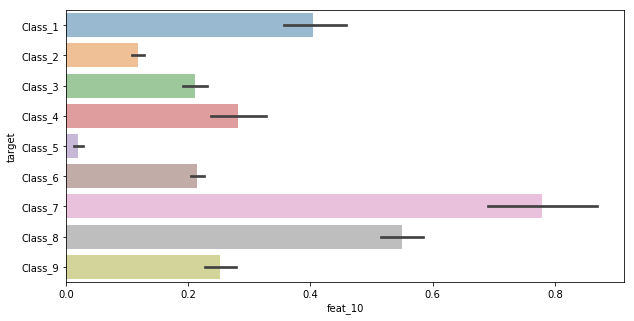

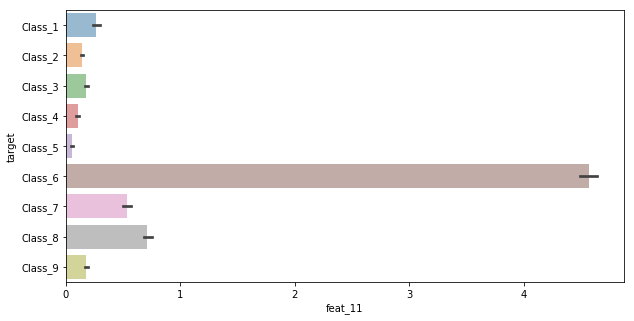

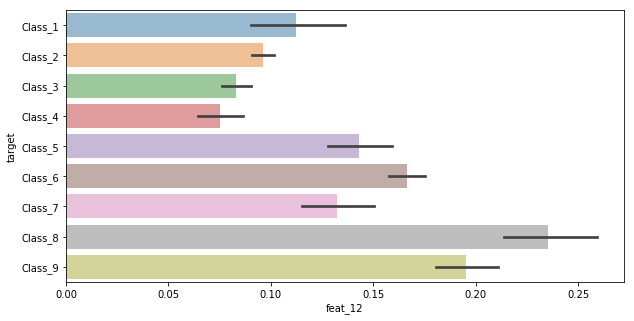

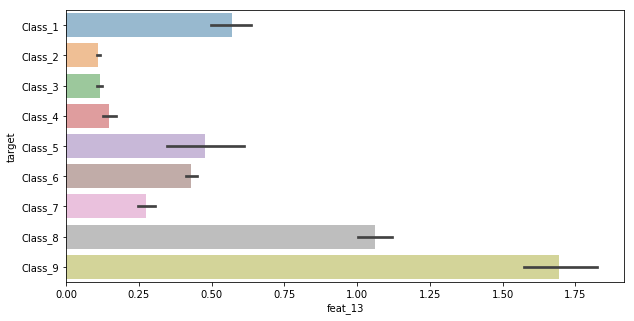

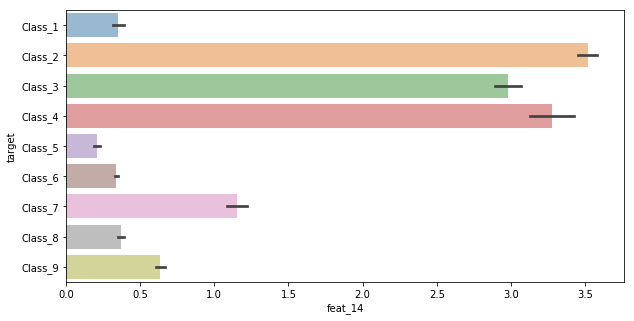

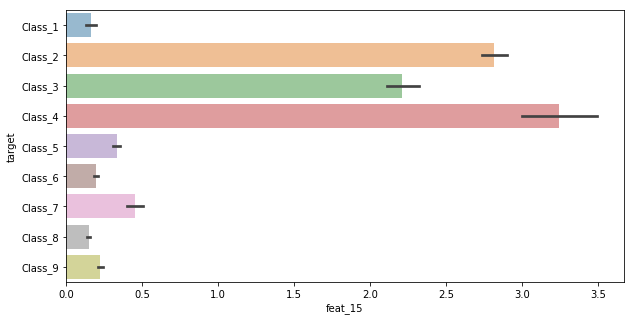

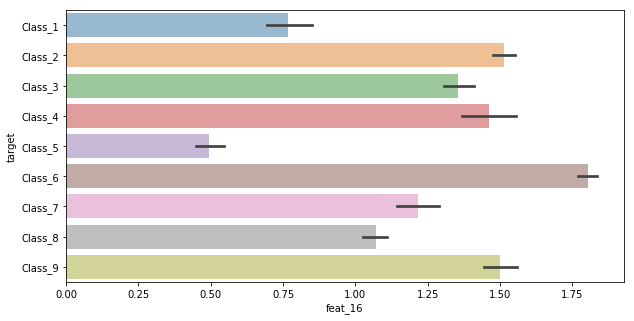

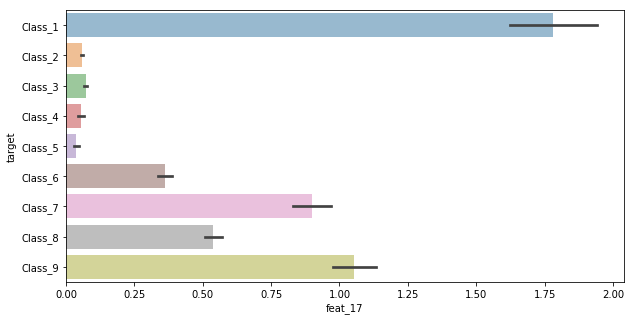

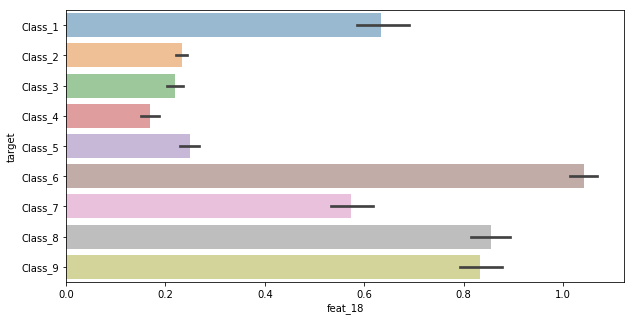

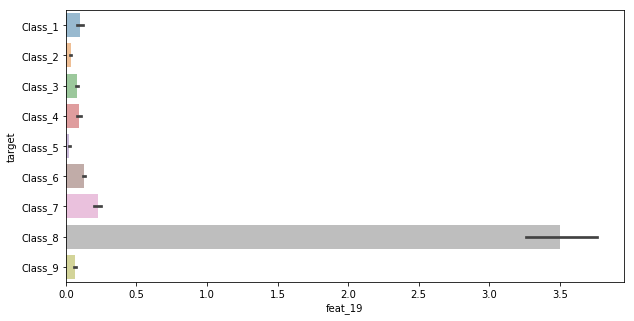

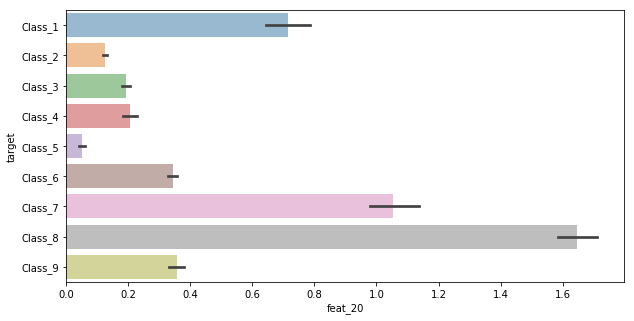

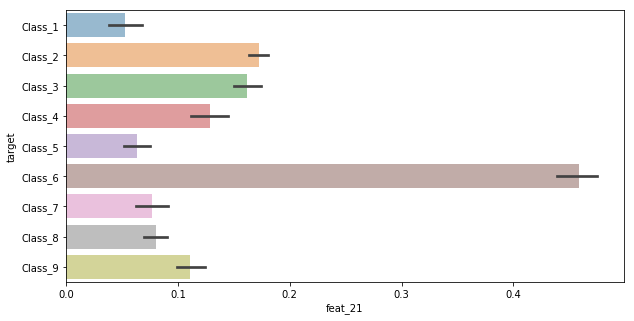

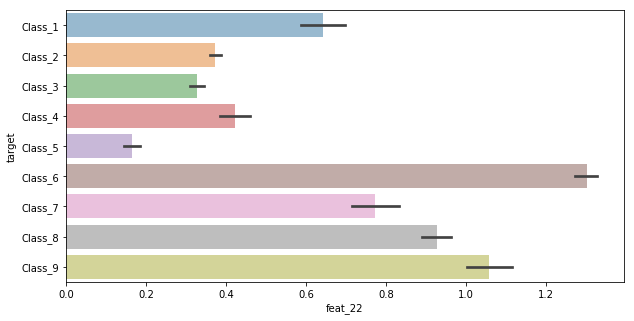

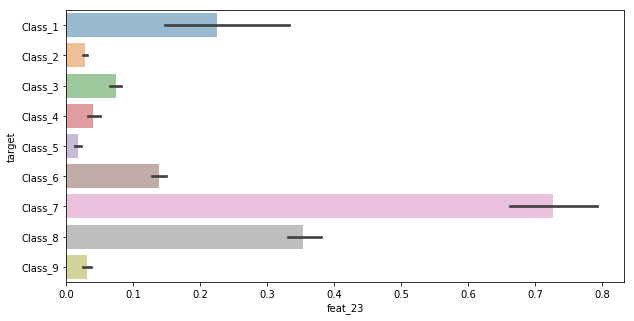

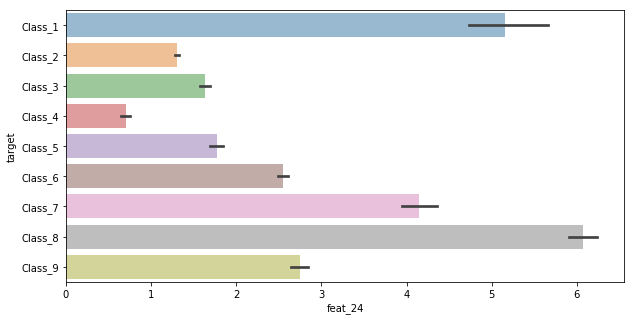

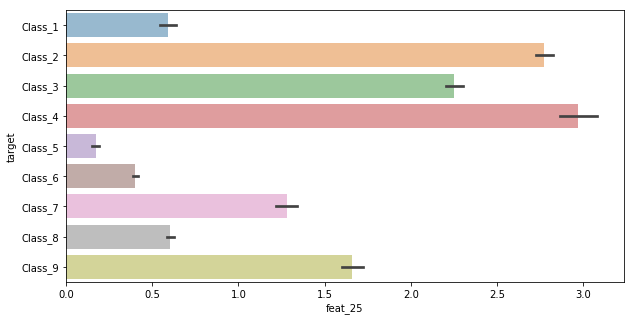

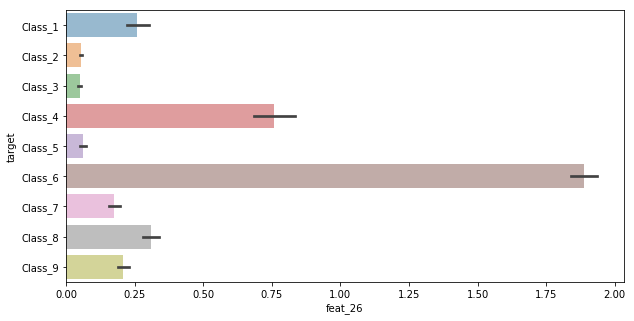

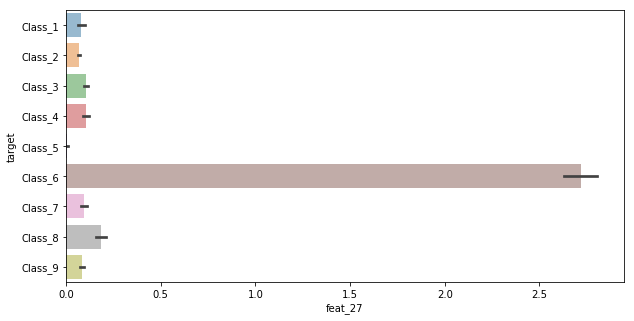

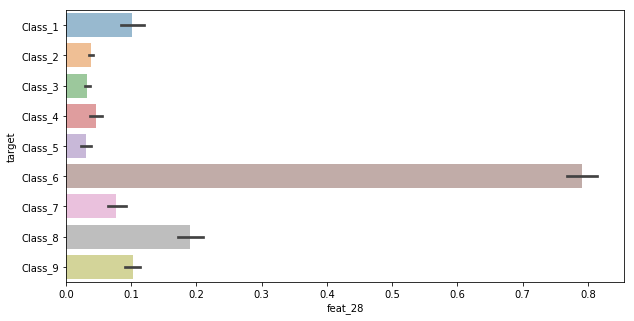

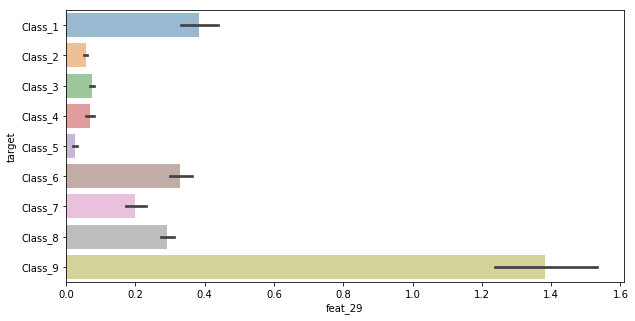

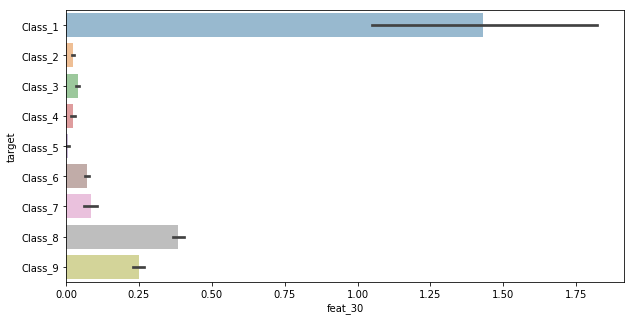

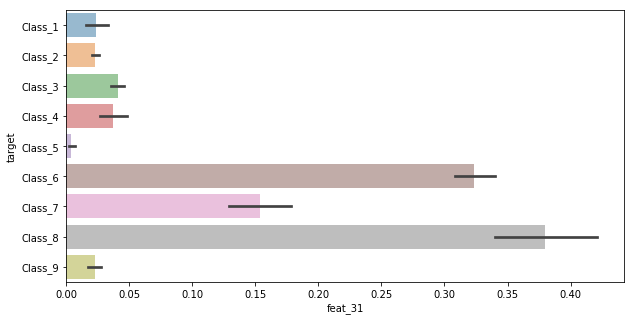

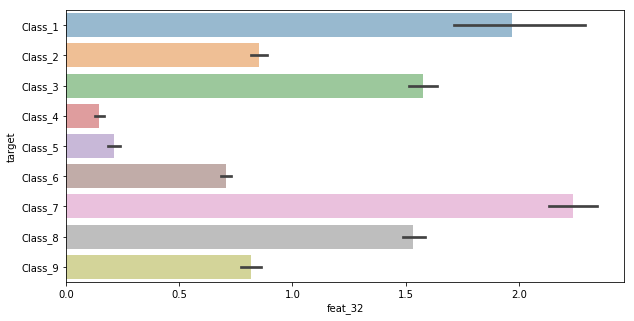

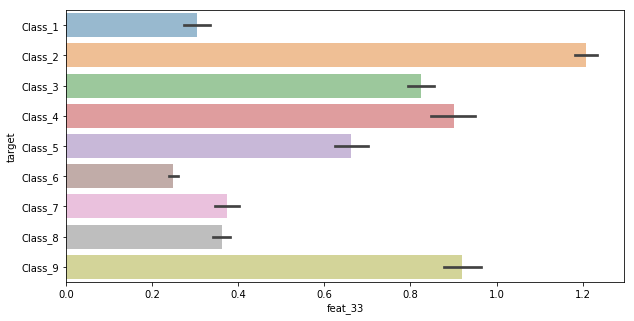

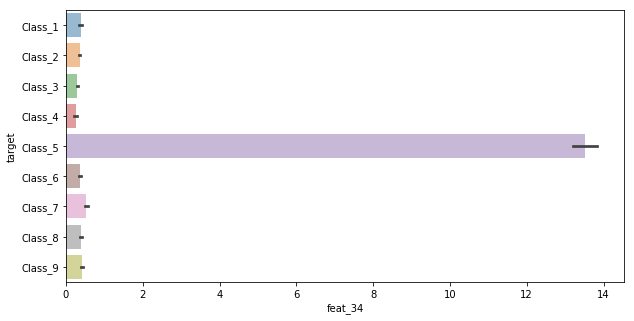

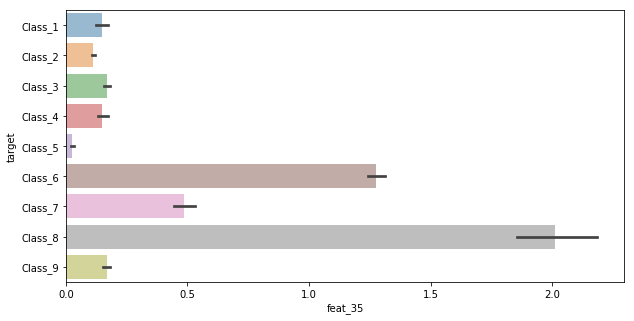

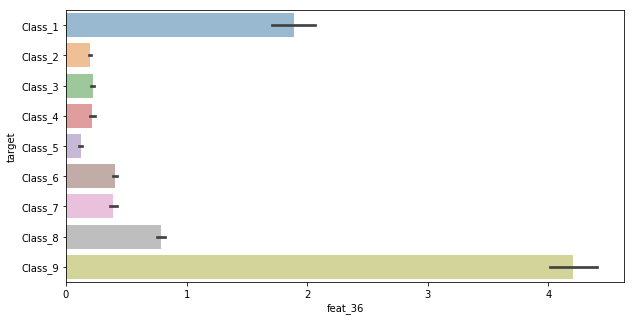

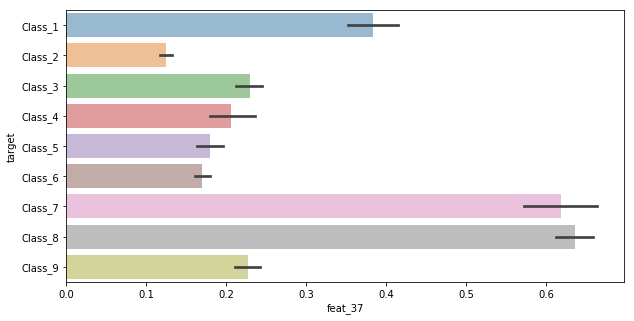

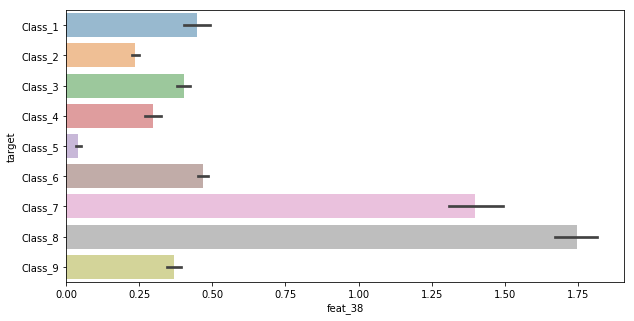

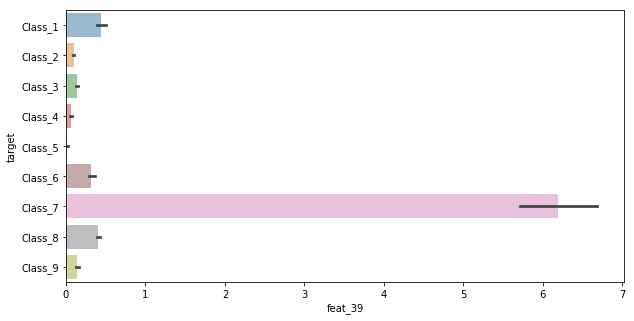

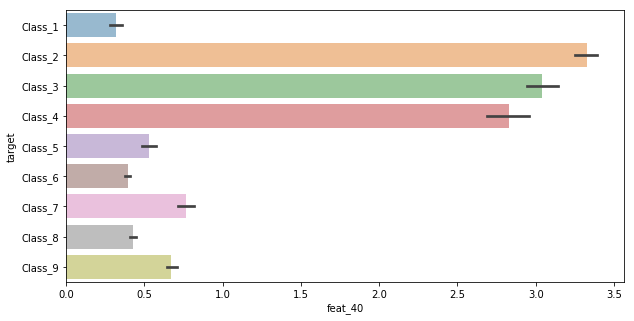

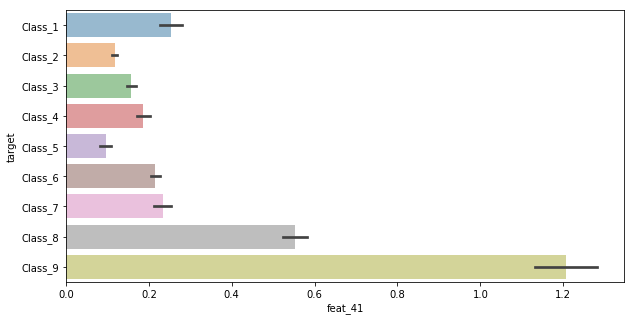

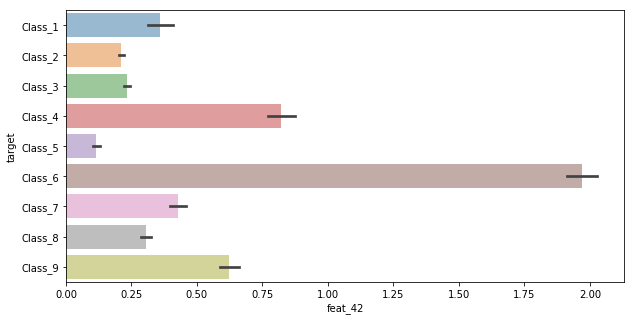

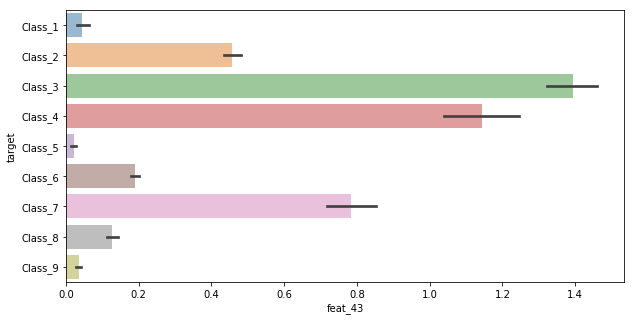

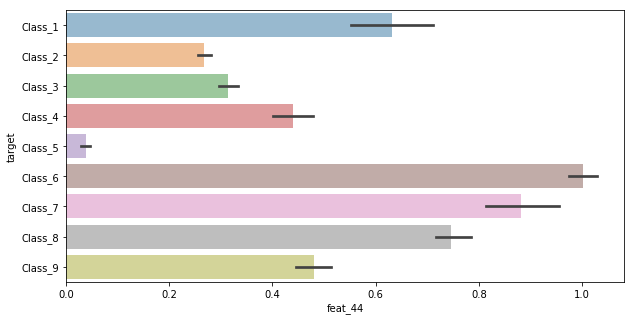

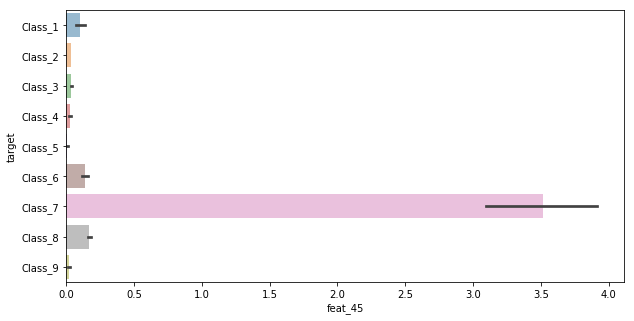

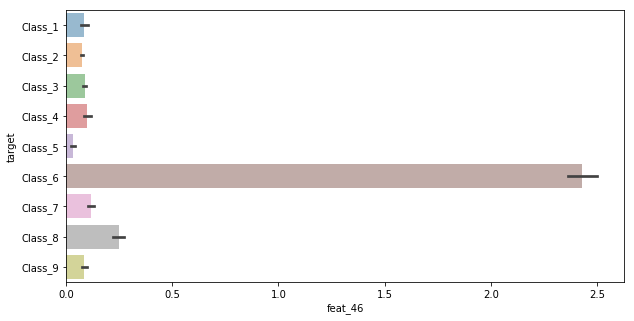

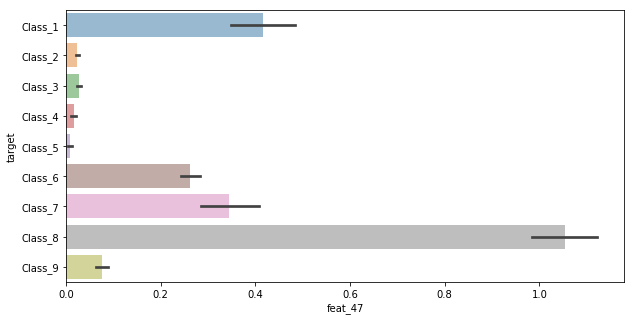

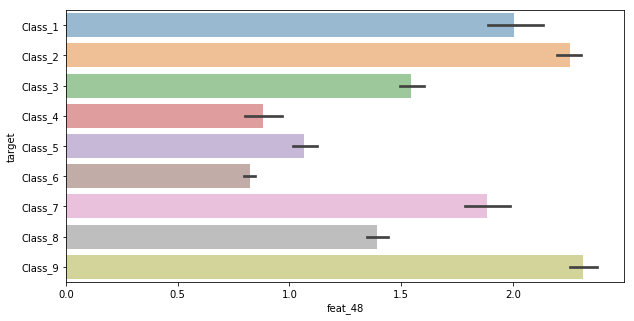

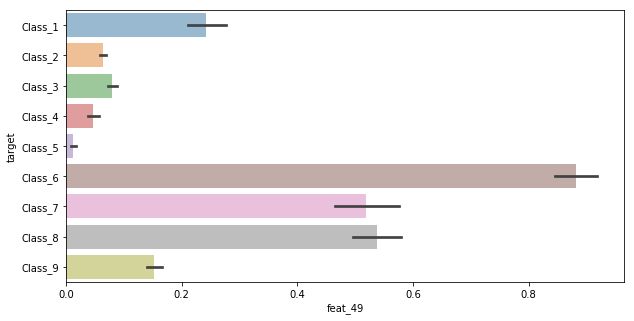

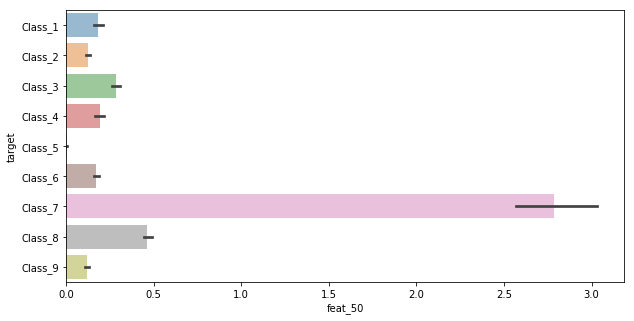

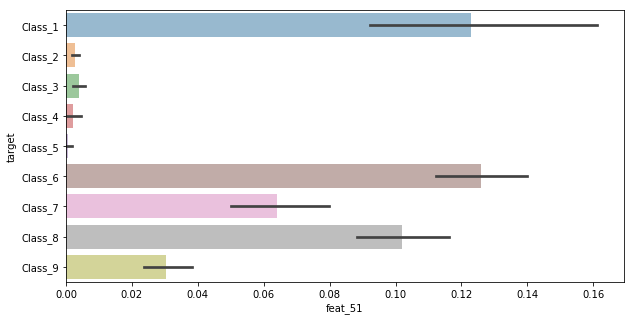

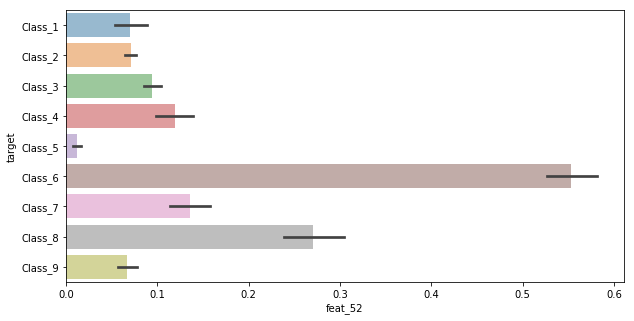

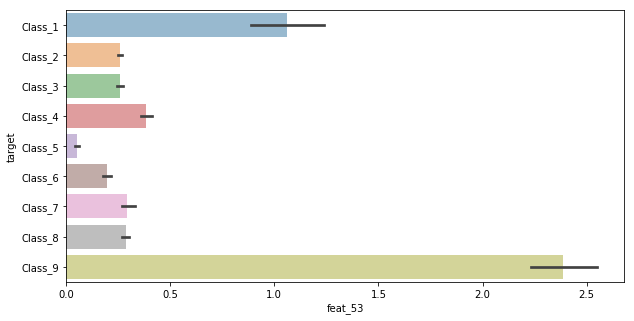

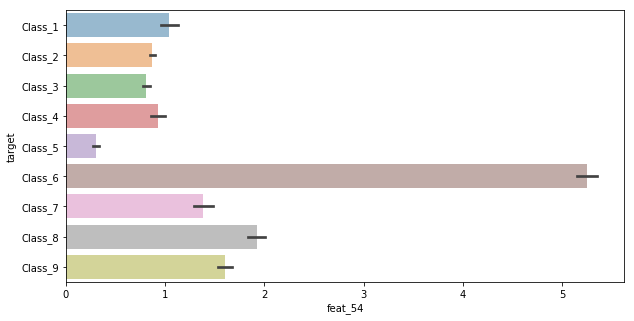

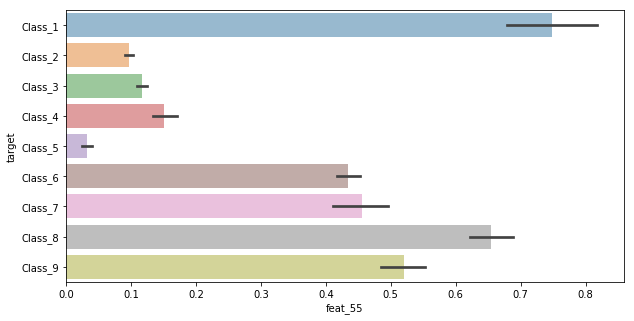

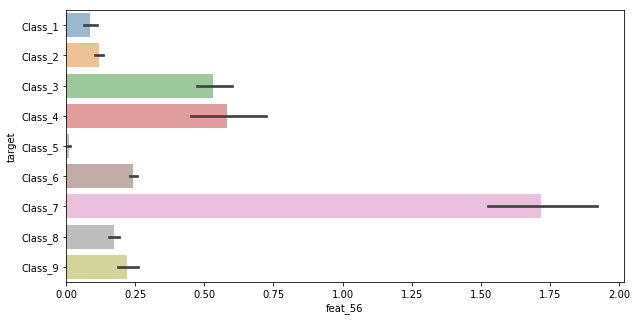

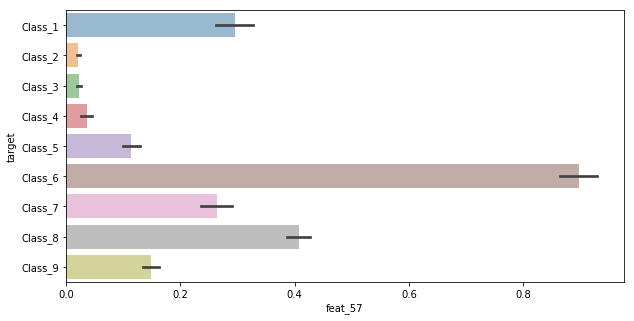

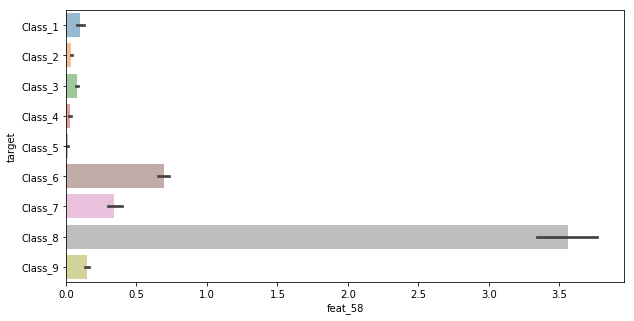

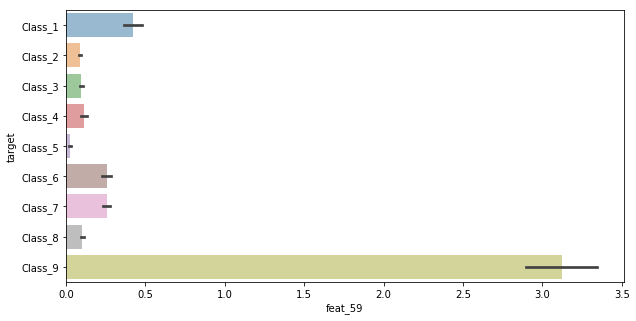

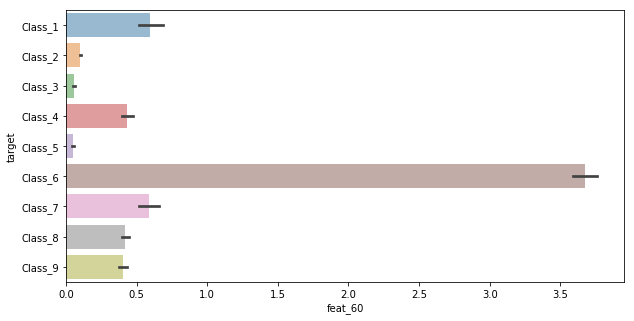

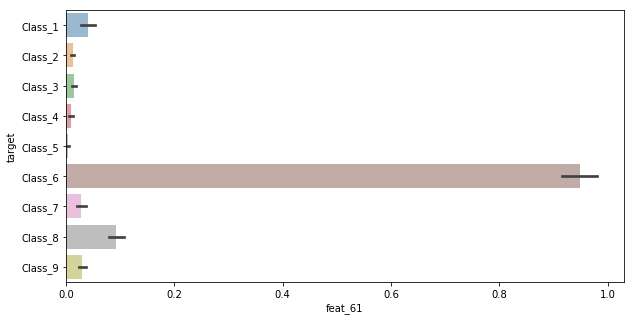

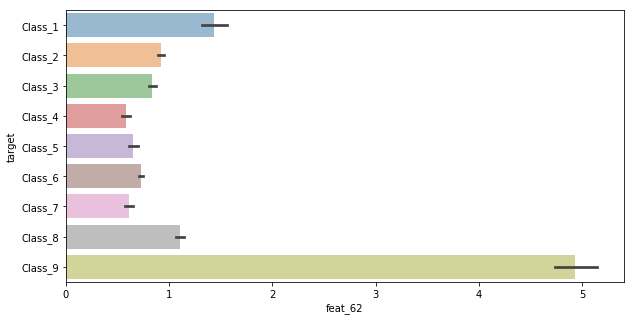

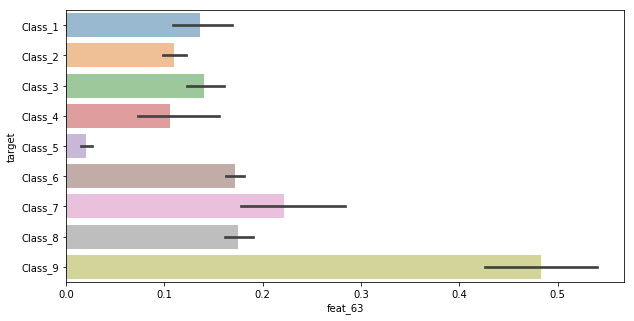

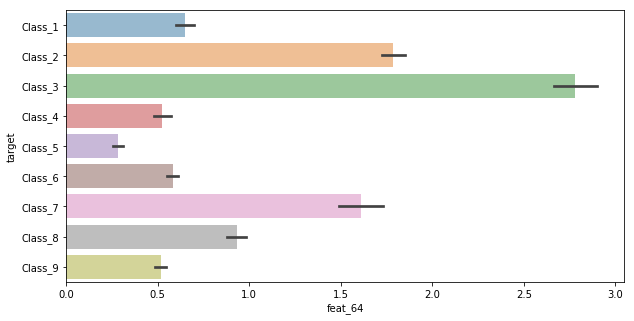

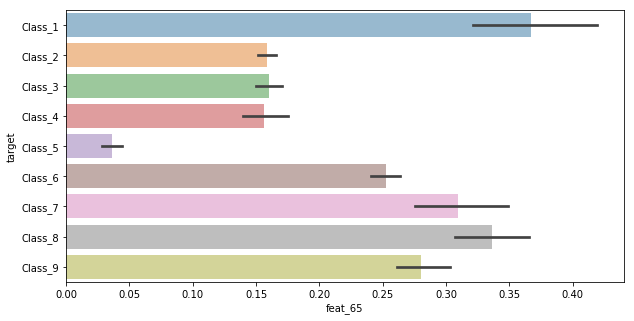

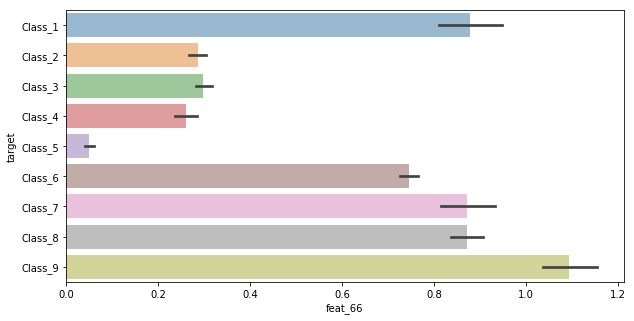

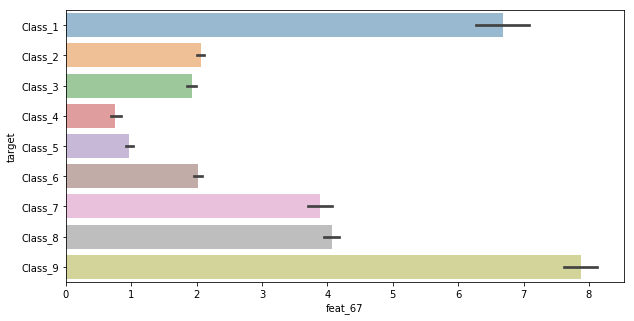

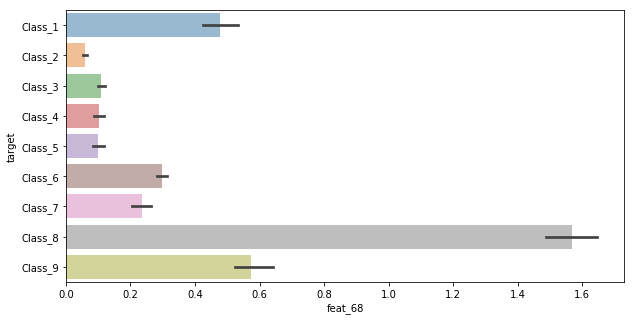

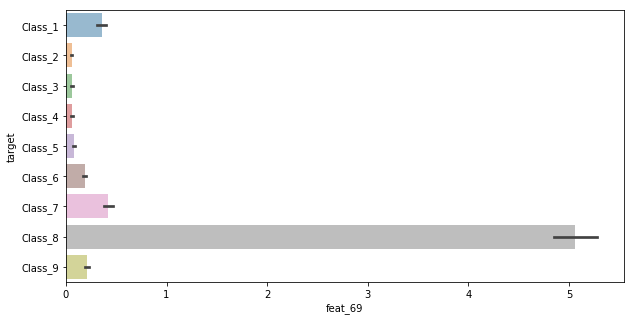

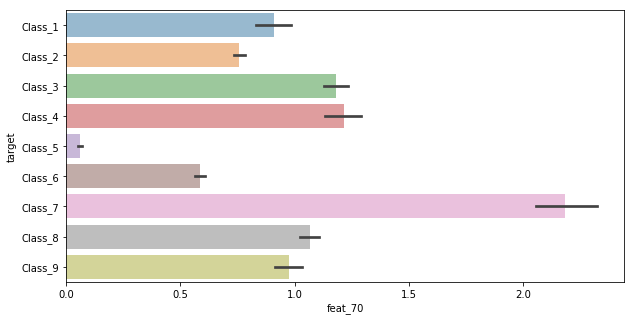

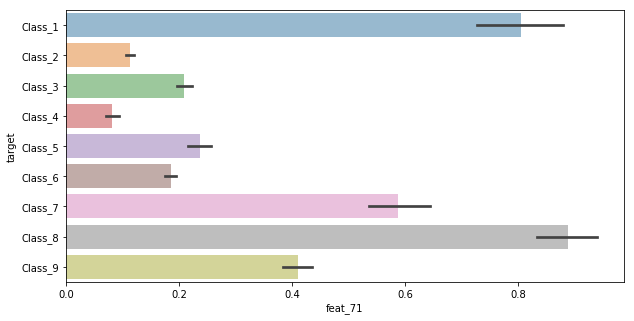

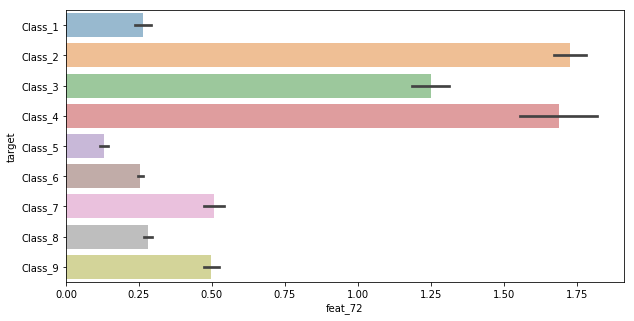

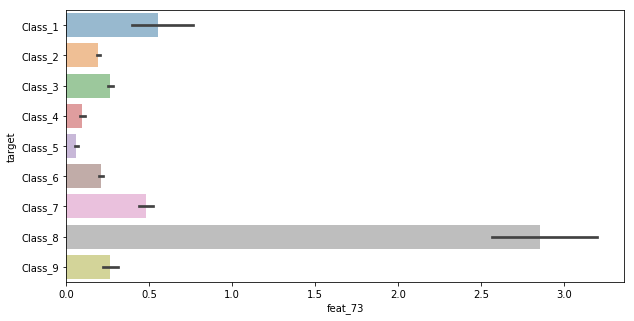

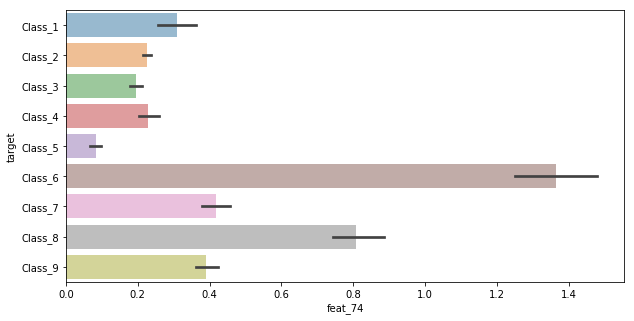

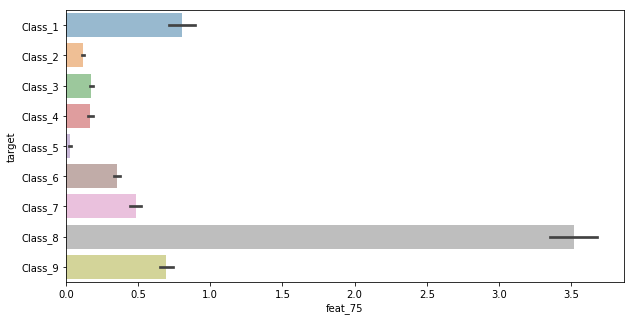

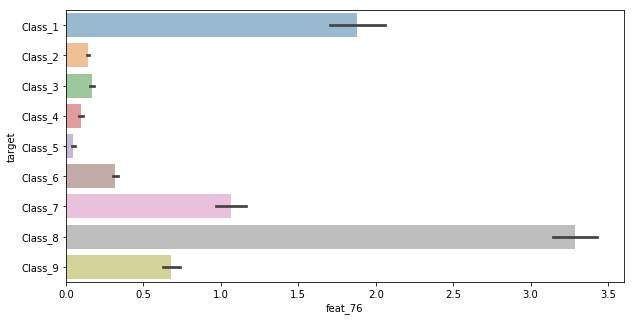

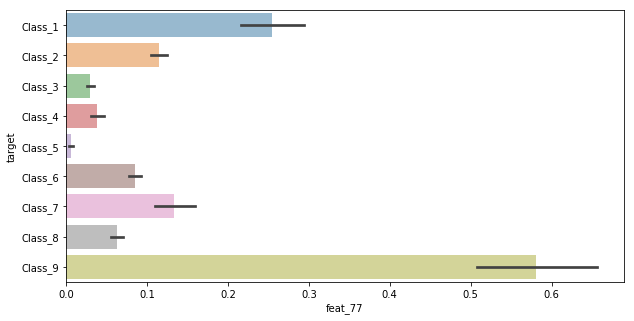

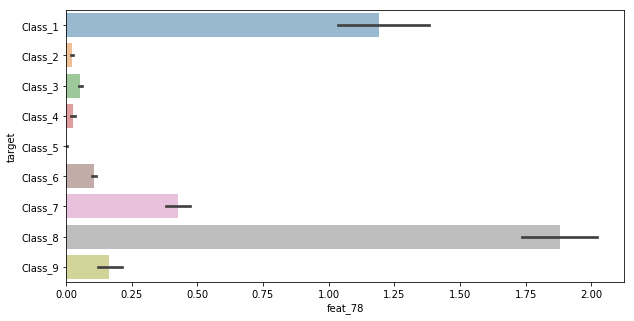

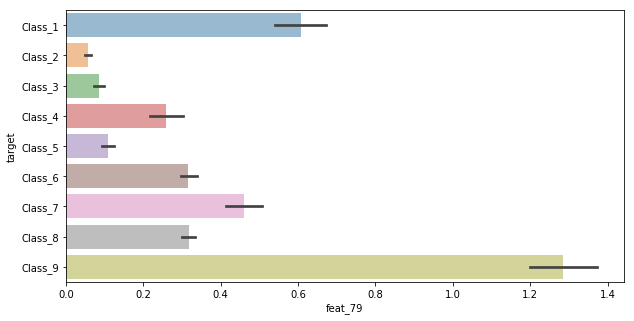

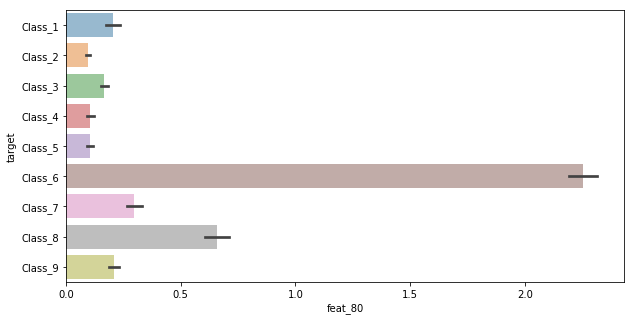

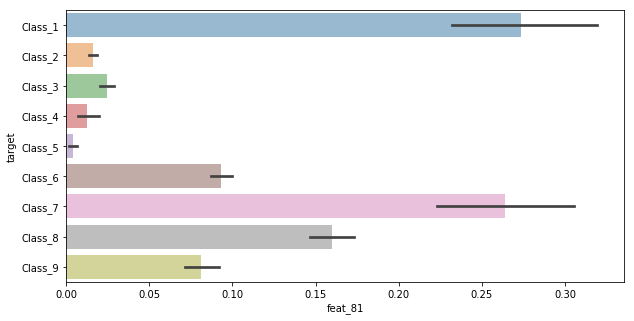

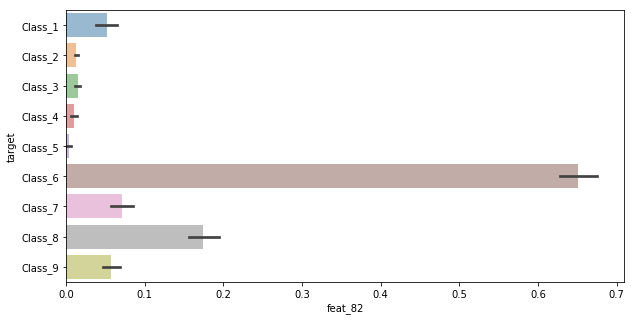

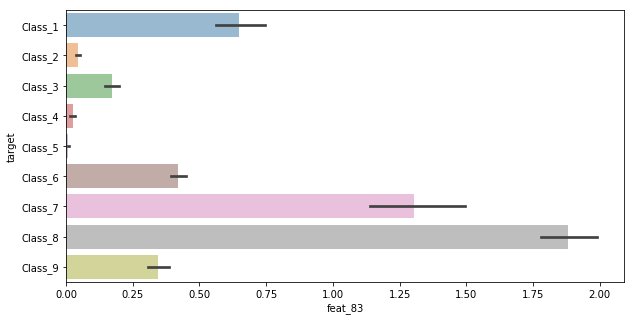

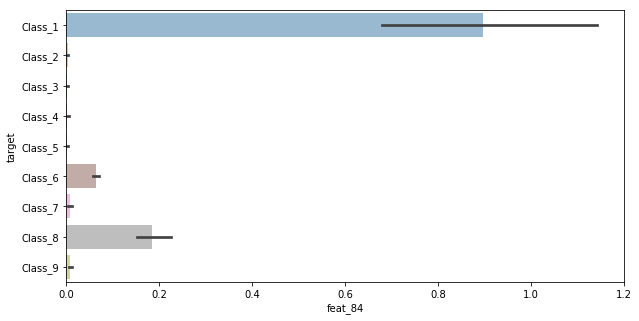

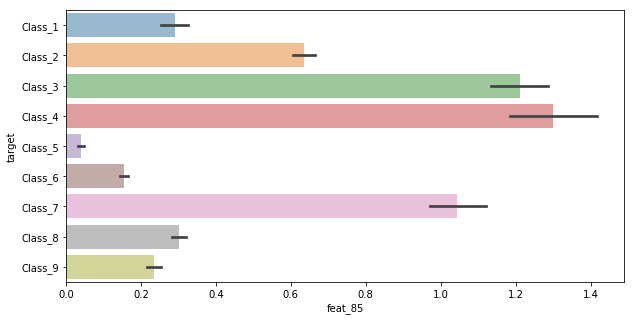

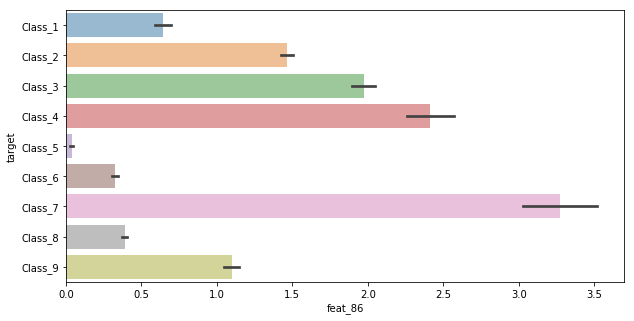

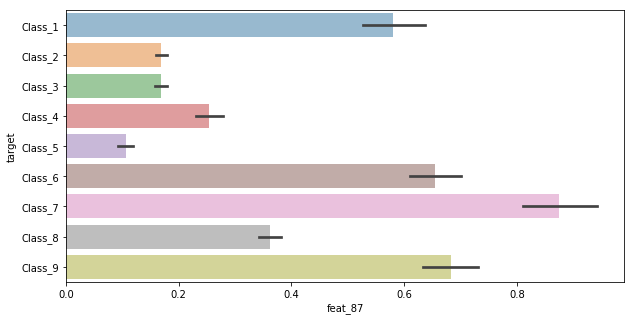

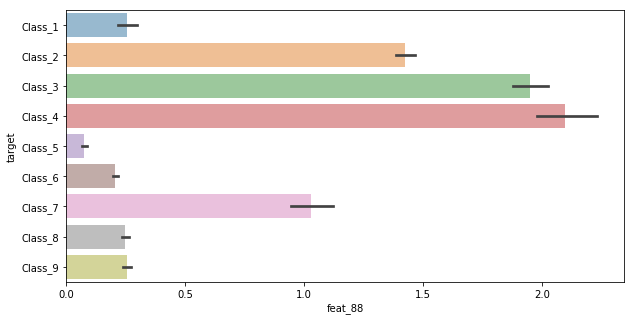

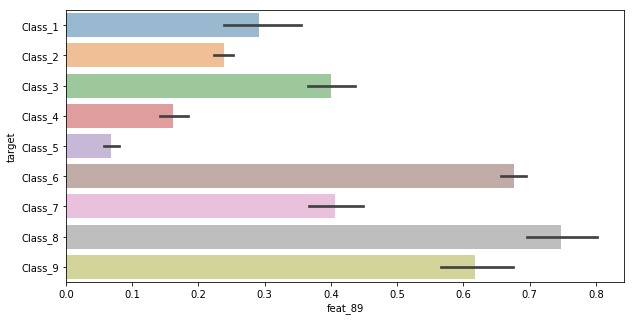

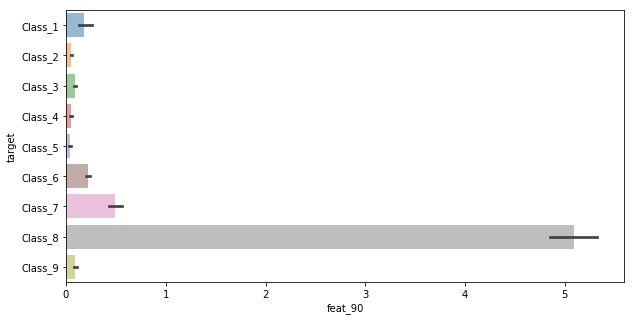

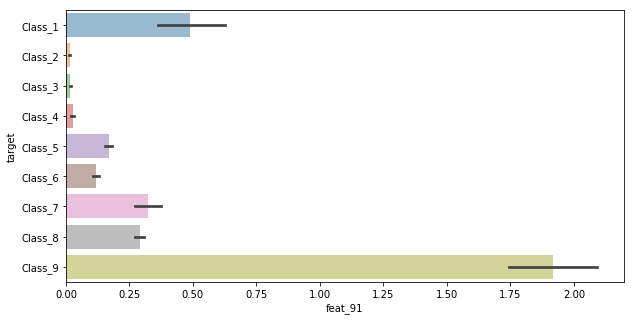

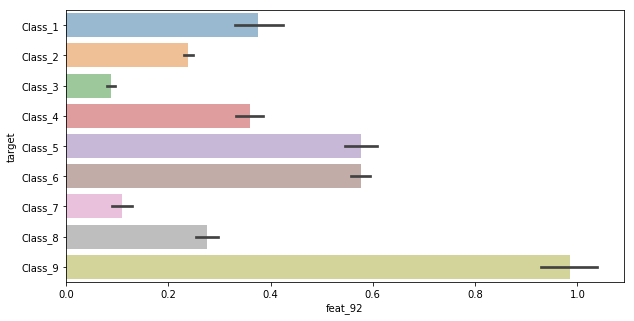

In [17]:
for i in range(1,93): # hard coding due to memory error(?)
   # bar_plot('feat_'+str(i),train)
    bar_plot_comp('feat_'+str(i),train)


Text(0.5,1,'Weight Of Features')

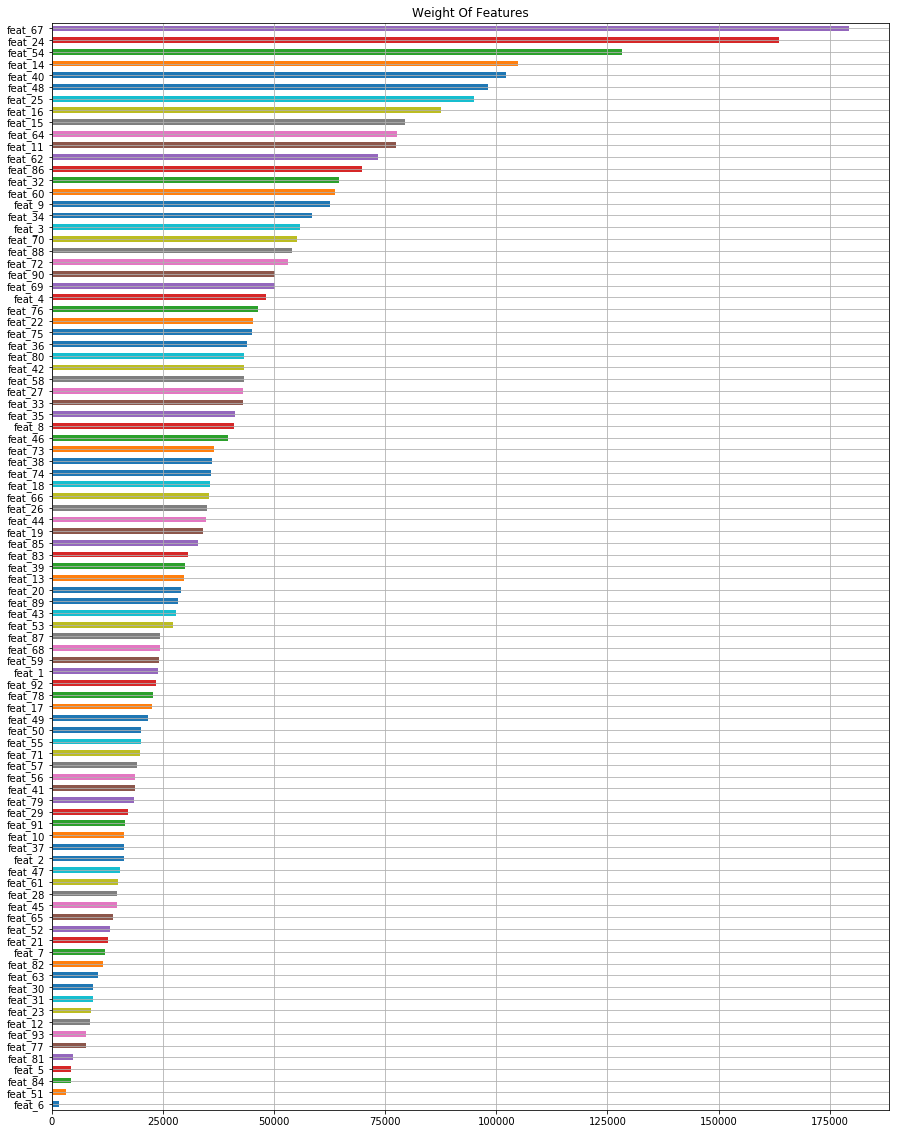

In [34]:
# plot weight of features
wt = train.sum()
wt.drop(['target','id']).sort_values().plot(kind='barh', figsize=(15,20))
plt.grid()
plt.title("Weight Of Features")

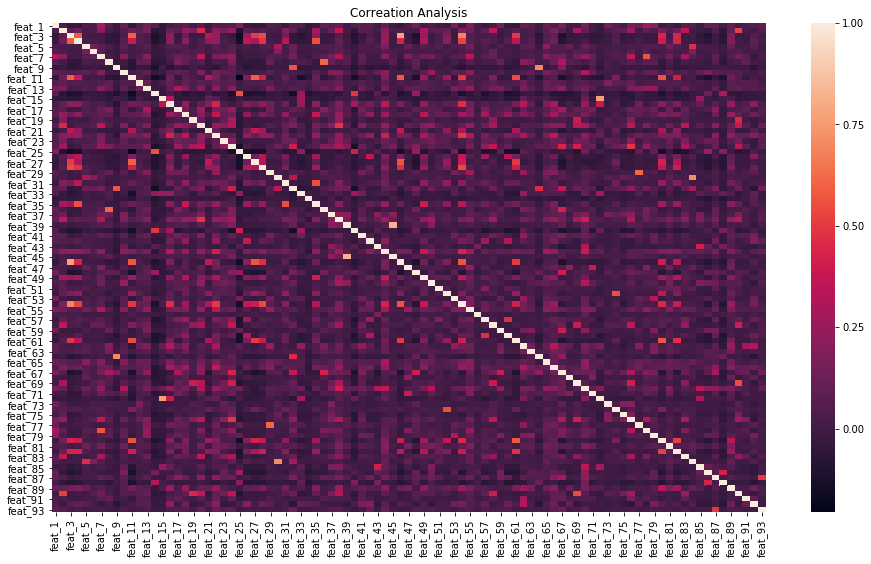

In [35]:
plt.figure(figsize=(16,9))
plt.title("Correation Analysis")
df = train.drop(['id','target'],axis=1).corr()
sns.heatmap(df)

Text(0.5,1,'Covariance Analysis')

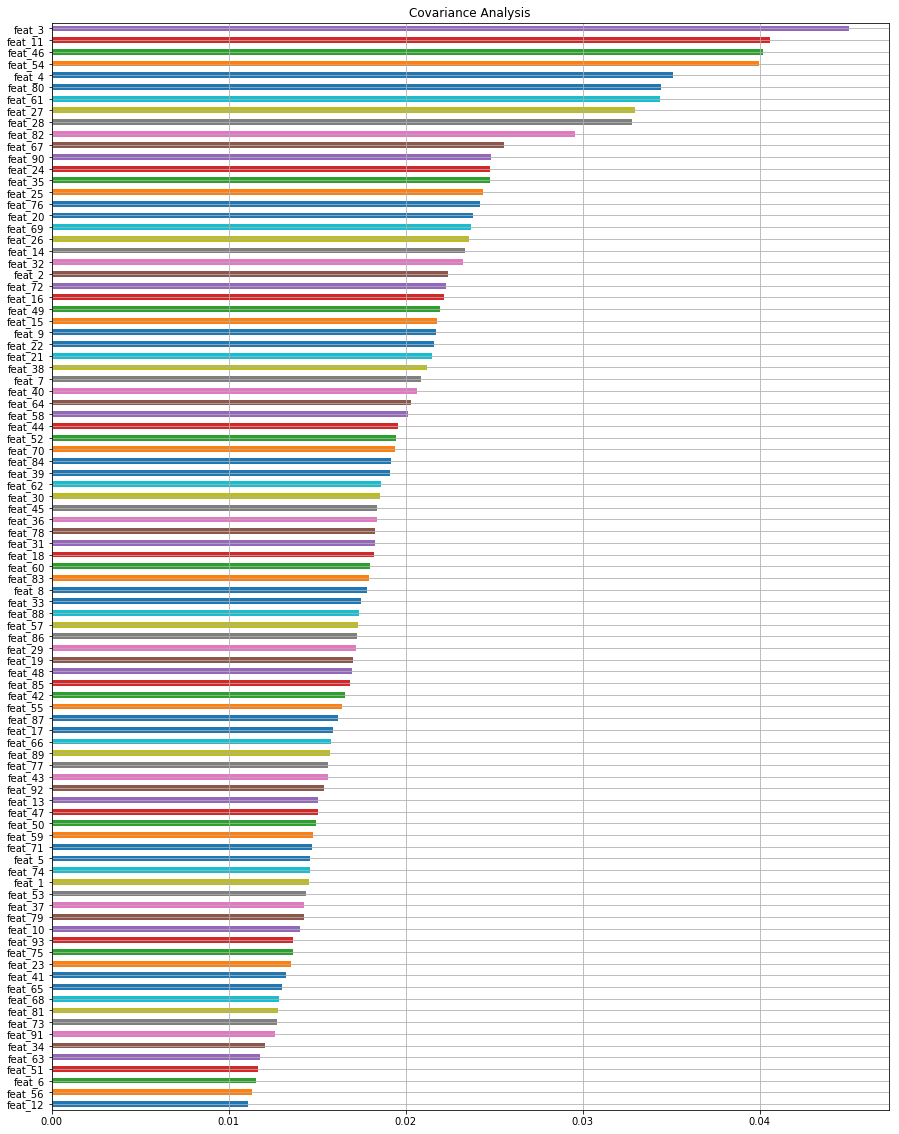

In [36]:
df.var().sort_values().plot(kind='barh', figsize=(15,20))
plt.grid()
plt.title("Covariance Analysis")

In [3]:
labels = train.target.values
labels = LabelEncoder().fit_transform(labels)
train = train.drop(['id', 'target'], axis = 1)
features = list(train.columns[0:])
test = test.drop('id',axis=1)

In [4]:
params = {"objective": "multi:softprob", "eval_metric":"mlogloss", "num_class": 9}
train_xgb = xgb.DMatrix(train, labels)
test_xgb = xgb.DMatrix(test)
rounds = 100
gbm = xgb.train(params, train_xgb, rounds)
pred = gbm.predict(test_xgb)

[23:02:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[23:02:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[23:02:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[23:02:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[23:02:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[23:02:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[23:02:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree prunin

In [5]:
dump = open('xgb.fmap', 'w')
i = 0
for feat in features:
    dump.write('{0}\t{1}\tq\n'.format(i,feat))
    i = i + 1
dump.close()

<Figure size 432x288 with 0 Axes>

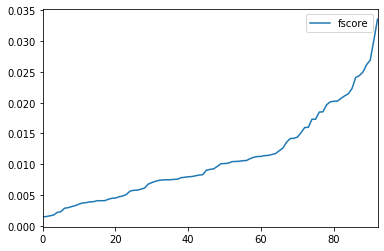

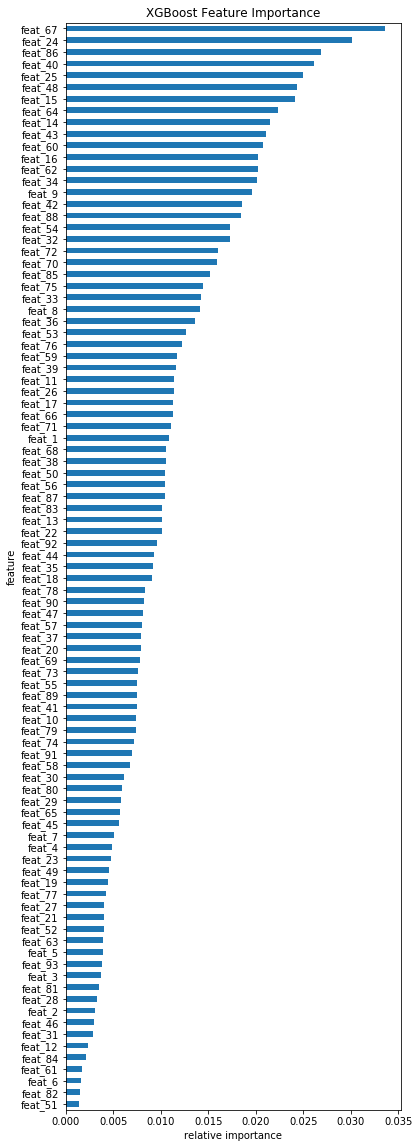

In [9]:
feature_importance = gbm.get_fscore(fmap='xgb.fmap')
feature_importance = sorted(feature_importance.items(), key = operator.itemgetter(1))
df = pd.DataFrame(feature_importance, columns = ['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()
plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 20))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')

In [11]:
sample = pd.read_csv('sampleSubmission.csv')

In [12]:
pred = pd.DataFrame(pred, index=sample.id.values, columns=sample.columns[1:])
pred.to_csv('submit.csv', index_label='id')